In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

['fruits']
fruits



<a id='3'></a>
# Import Library

In [2]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id='4'></a>
# Test and Train Dataset File Paths

In [3]:
train_path="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/"
test_path="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/"

In [4]:
train_fruits_name = []
train_fruits_image_name = []
for i in os.listdir(train_path):
    for train_image_filename in os.listdir(train_path+i):
        train_fruits_name.append(i)
        train_fruits_image_name.append(train_image_filename)

In [5]:
train_fruits_df=pd.DataFrame(train_fruits_name,columns=["fruits name"])
train_fruits_df["fruits image"]=train_fruits_image_name

In [6]:
test_fruits_name = []
test_fruits_image_name = []
for i in os.listdir(test_path):
    for test_image_filename in os.listdir(test_path+i):
        test_fruits_name.append(i)
        test_fruits_image_name.append(test_image_filename)

In [7]:
test_fruits_df=pd.DataFrame(test_fruits_name,columns=["fruits name"])
test_fruits_df["fruits image"]=test_fruits_image_name

<a id='5'></a>
# Data Analysis

In [8]:
uniqFruits=train_fruits_df["fruits name"].value_counts().reset_index()
uniqFruits

,fruits name,count
0,Grape Blue,984
1,Plum 3,900
2,Cherry 2,738
3,Tomato 1,738
4,Tomato 3,738
...,...,...
126,Cucumber Ripe,392
127,Tomato Maroon,367
128,Pear Kaiser,300
129,Mangostan,300


<a id='7'></a>
# Visualization of Fruit Images

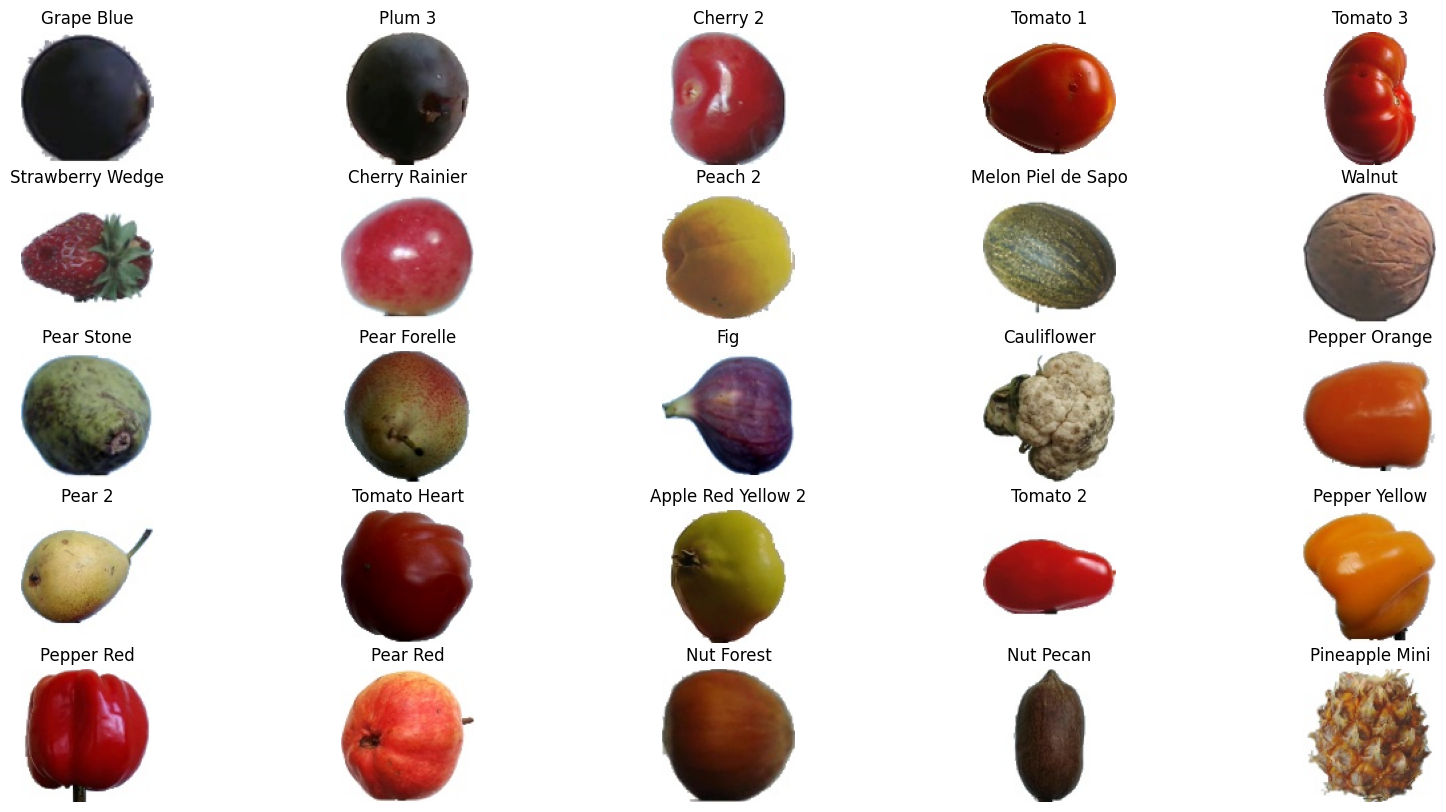

In [9]:
fig=plt.figure(figsize=(20,10))


for i in range(25):
   
    ax=fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
    plt.title(uniqFruits["fruits name"][i])
    plt.axis("off")
    all_files = os.listdir(train_path + uniqFruits["fruits name"][i])

    
    first_image_name = all_files[0]
    ax.imshow(image.load_img(train_path + uniqFruits["fruits name"][i]+"/"+first_image_name))

In [10]:
numberOfClasses=len(uniqFruits)
print("There are" ,numberOfClasses, "different classes ")

There are 131 different classes 


In [11]:
img=image.load_img(train_path + uniqFruits["fruits name"][0]+"/"+"0_100.jpg")
array_image = image.img_to_array(img)
print(array_image.shape)

(100, 100, 3)


<a id='8'></a>
# Create Cnn Model

In [12]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=array_image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.35))

model.add(Dense(numberOfClasses,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [14]:
batch_size=64
epochs=10

train_datagen=ImageDataGenerator(rescale= 1./255,
                          rotation_range=0.15,
                          zoom_range=0.15,
                          width_shift_range=0.15,
                          height_shift_range=0.15,
                          horizontal_flip=True
                          )


test_datagen=ImageDataGenerator(rescale= 1./255,
                          )


train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=array_image.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")

test_generator=test_datagen.flow_from_directory(test_path,
                                                 target_size=array_image.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [15]:
history=model.fit_generator(generator=train_generator,
                           steps_per_epoch=3200//batch_size,
                           epochs=epochs,
                           validation_data=test_generator,
                           validation_steps=1600//batch_size)

Epoch 1/10
50/50 [==============================] - 30s 523ms/step - loss: 4.7068 - accuracy: 0.0181 - val_loss: 4.3492 - val_accuracy: 0.0325
Epoch 2/10
50/50 [==============================] - 26s 526ms/step - loss: 4.1252 - accuracy: 0.0463 - val_loss: 3.8855 - val_accuracy: 0.0519
Epoch 3/10
50/50 [==============================] - 25s 495ms/step - loss: 3.6169 - accuracy: 0.0928 - val_loss: 3.0284 - val_accuracy: 0.1906
Epoch 4/10
50/50 [==============================] - 23s 465ms/step - loss: 3.1564 - accuracy: 0.1572 - val_loss: 2.5180 - val_accuracy: 0.3131
Epoch 5/10
50/50 [==============================] - 24s 489ms/step - loss: 2.6971 - accuracy: 0.2412 - val_loss: 2.8053 - val_accuracy: 0.2400
Epoch 6/10
50/50 [==============================] - 23s 454ms/step - loss: 2.3768 - accuracy: 0.3116 - val_loss: 1.8299 - val_accuracy: 0.4181
Epoch 7/10
50/50 [==============================] - 21s 424ms/step - loss: 1.9960 - accuracy: 0.3844 - val_loss: 1.4869 - val_accuracy: 0.5406

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

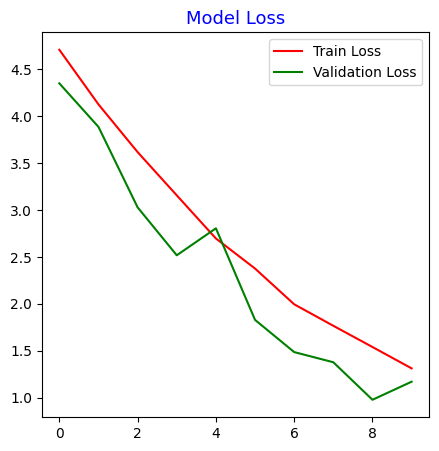

In [17]:
plt.figure(figsize=(5,5))
plt.plot(history.history["loss"],label = "Train Loss", color = "red")
plt.plot(history.history["val_loss"],label = "Validation Loss",color = "green")
plt.title("Model Loss", color = "blue", size = 13)
plt.legend()
plt.show()

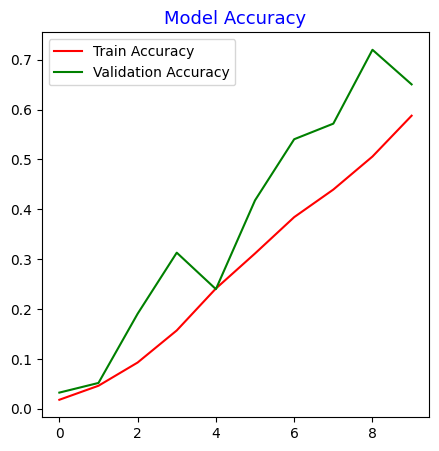

In [18]:
plt.figure(figsize=(5,5))
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "red")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "green")
plt.title("Model Accuracy", color = "blue", size = 13)
plt.legend()
plt.show()